In [6]:
%%capture
from pathlib import Path
import pandas as pd
import numpy as np
from datasets import Dataset

In [7]:
DATA = Path.cwd().parent / 'data'
SUMM_FOLDER = DATA / 'summaries_finetune'
TEXT_FILES = SUMM_FOLDER / 'text_files_copy'
SOURCE_TEXTS = SUMM_FOLDER / 'source_texts_clean'

In [8]:
summaries_df = pd.read_csv(SUMM_FOLDER / 'final_summaries_ai_aloe_fixed.csv', index_col=False)

In [12]:
df = summaries_df[['text', 'prompt', 'content_pca', 'paraphrase_pca']]
ds = Dataset.from_pandas(df.reset_index(drop=True))


In [10]:
from transformers import AutoModel, BigBirdTokenizer, DataCollatorWithPadding
import torch

seed = 42
model_name = "google/bigbird-roberta-base"
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = AutoModel.from_pretrained(model_name).to(DEVICE)
tokenizer = BigBirdTokenizer.from_pretrained(model_name)

def getLastState(text):
    tokenized_text = tokenizer(text, return_tensors='pt').to(DEVICE)
    outputs = model(**tokenized_text)
    return outputs.last_hidden_state[0][0]

Some weights of the model checkpoint at google/bigbird-roberta-base were not used when initializing BigBirdModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BigBirdModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BigBirdModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
def get_doc_embed(dataset):
    loader = torch.utils.data.DataLoader(dataset, batch_size=BATCH_SIZE)
    features = np.empty([0,768])
    for batch in tqdm(loader):
        with torch.no_grad():
            cls_tok = model(batch['input_ids'],
                            batch['attention_mask'])['hidden_states'][-1][:,0,:]
            features = np.vstack((features,
                                  cls_tok.cpu().numpy()))
    print(features.shape)
    
    outdf = dataset.to_pandas().rename(
        columns={
            'Prompt': 'prompt',
            'Participant': 'id',
        }
    )[[
        'Filename',
        'id',
        'prompt',
        'VST',
        'label',
    ]]
    
    outdf['is_test'] = is_test
    
    return pd.concat([outdf, pd.DataFrame(features)], axis='columns')

In [6]:
from scipy import spatial

def getSimilarity(df):
    text_embedding = getLastState(ds['text']).detach().numpy()
    prompt_embedding = getLastState(df['prompt']).detach().numpy()
    return 1 - spatial.distance.cosine(text_embedding, prompt_embedding)

df['cos_similarity'] = df.apply(lambda x: getSimilarity(x), axis = 1)

Attention type 'block_sparse' is not possible if sequence_length: 10 <= num global tokens: 2 * config.block_size + min. num sliding tokens: 3 * config.block_size + config.num_random_blocks * config.block_size + additional buffer: config.num_random_blocks * config.block_size = 704 with config.block_size = 64, config.num_random_blocks = 3. Changing attention type to 'original_full'...


TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

In [36]:
df[['cos_similarity', 'paraphrase_pca']].corr()

,cos_similarity,paraphrase_pca
cos_similarity,1.000000,0.205329
paraphrase_pca,0.205329,1.000000


In [37]:
df[['cos_similarity', 'content_pca']].corr()

,cos_similarity,content_pca
cos_similarity,1.000000,0.286041
content_pca,0.286041,1.000000


NameError: name 'savefig' is not defined

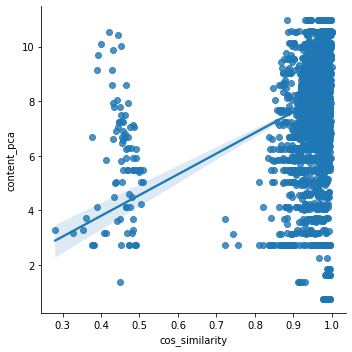

In [38]:
import seaborn as sns

sns.lmplot(data=df, x='cos_similarity', y='content_pca')
savefig

In [78]:
df.to_csv('cos_similarity.csv')

Index(['text', 'prompt', 'content_pca', 'paraphrase_pca', 'cos_similarity'], dtype='object')

In [77]:
i = 1260
print(len(df))
print('cosine similarity\n', df.sort_values(by='cos_similarity').reset_index().iloc[i]['cos_similarity'])
print('SOURCE\n', df.sort_values(by='cos_similarity').reset_index().iloc[i]['prompt'])
print('TEXT\n', df.sort_values(by='cos_similarity').reset_index().iloc[i]['text'])

4690
cosine similarity
 0.9386657476425171
SOURCE
 Text 1



Different types of radiation

Houghton Mifflin Harcourt

Excerpt from “From particles to quasars”, a textbook in physics for upper secondary school 

By science teachers Sara Thompson and Brett Livingston 



Ultraviolet radiation

Ultraviolet radiation (UV) is electromagnetic radiation with a higher energy than visible light. UV radiation comes naturally from the sun, but is also produced in tanning beds.



The UV index is a measure of the strength of UV radiation. A higher UV-index means stronger radiation, and the following categories are used: 1-2 (low radiation), 3-5 (moderate radiation), 6-7 (high radiation), 8-10 (very high radiation) and 11→ (extreme radiation). Radiation levels can be high or low depending on the seasons and elevation levels.  For example, a thick cloud cover and/or a thick ozone layer can reduce UV radiation, while UV radiation can increase when the sun is high in the sky. Snow and water also refle